In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [3]:
## Step 1: Load and Preprocess Data
# Define transformations for images
transform = transforms.Compose([
    transforms.ToTensor(),          # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize images
])


In [4]:
# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 581kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.48MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.52MB/s]


In [5]:

# Get the shape of the first image in the training dataset
image, label = train_dataset[0]
print("Image shape:", image.shape)
print("Number of training samples:", len(train_dataset))

Image shape: torch.Size([1, 28, 28])
Number of training samples: 60000


In [6]:
# Get the shape of the first image in the test dataset
image, label = test_dataset[0]
print("Image shape:", image.shape)
print("Number of testing samples:", len(test_dataset))

Image shape: torch.Size([1, 28, 28])
Number of testing samples: 10000


In [7]:

# Create DataLoader for batch processing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [8]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.conv1=nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3,padding=1)
        self.conv2=nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,padding=1)
        self.conv3=nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,padding=1)
        self.pool=nn.MaxPool2d(kernel_size=2,stride=2)
        self.fc1=nn.Linear(128*3*3,128)
        self.fc2=nn.Linear(128,64)
        self.fc3=nn.Linear(64,10)

    def forward(self, x):
      x=self.pool(torch.relu(self.conv1(x)))
      x=self.pool(torch.relu(self.conv2(x)))
      x=self.pool(torch.relu(self.conv3(x)))
      x=x.view(x.size(0),-1)
      x=torch.relu(self.fc1(x))
      x=torch.relu(self.fc2(x))
      x=self.fc3(x)
      return x


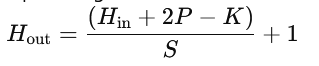

In [9]:
from torchsummary import summary

# Initialize model
model = CNNClassifier()

# Move model to GPU if available
if torch.cuda.is_available():
    device = torch.device("cuda")
    model.to(device)

# Print model summary
print('Name:  GANESH D      ')
print('Register Number:  212223240035    ')
summary(model, input_size=(1, 28, 28))

# Initialize model, loss function, and optimizer
criterion = nn.CrossEntropyLoss()
optimizer =optim.Adam(model.parameters(),lr=0.001)

Name:  GANESH D      
Register Number:  212223240035    
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 64, 14, 14]          18,496
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Conv2d-5            [-1, 128, 7, 7]          73,856
         MaxPool2d-6            [-1, 128, 3, 3]               0
            Linear-7                  [-1, 128]         147,584
            Linear-8                   [-1, 64]           8,256
            Linear-9                   [-1, 10]             650
Total params: 249,162
Trainable params: 249,162
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.42
Params size (MB): 0.95
Estimated Total Si

In [10]:
## Step 3: Train the Model
def train_model(model, train_loader, num_epochs=10):
  for epoch in range(num_epochs):
     model.train()
     running_loss=0.0
     for images,labels in train_loader:
      if torch.cuda.is_available():
        images,labels=images.to(device),labels.to(device)
      optimizer.zero_grad()
      outputs=model(images)
      loss=criterion(outputs,labels)
      loss.backward()
      optimizer.step()
      running_loss+=loss.item()
     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')
  print('Name: GANESH D ')
  print('Register Number: 212223240035      ')
# Train the model
train_model(model, train_loader, num_epochs=10)

Epoch [1/10], Loss: 0.1774
Epoch [2/10], Loss: 0.0497
Epoch [3/10], Loss: 0.0346
Epoch [4/10], Loss: 0.0283
Epoch [5/10], Loss: 0.0229
Epoch [6/10], Loss: 0.0197
Epoch [7/10], Loss: 0.0159
Epoch [8/10], Loss: 0.0137
Epoch [9/10], Loss: 0.0133
Epoch [10/10], Loss: 0.0119
Name: GANESH D 
Register Number: 212223240035      


Name: GANESH D 
Register Number: 212223240035 
Test Accuracy: 0.9888
Name:TAMIZHSELVAN B 
Register Number:212223230225 


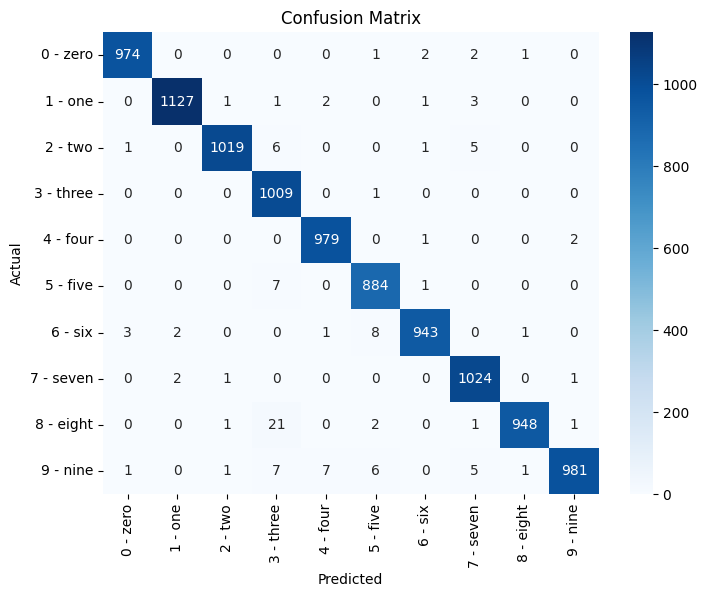

Name:TAMIZHSELVAN B 
Register Number: 212223230225
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.96      1.00      0.98      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.97      0.98       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [11]:
## Step 4: Test the Model

def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            if torch.cuda.is_available():
                images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct / total
    print('Name: GANESH D ')
    print('Register Number: 212223240035 ')
    print(f'Test Accuracy: {accuracy:.4f}')
    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    print('Name:TAMIZHSELVAN B ')
    print('Register Number:212223230225 ')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    # Print classification report
    print('Name:TAMIZHSELVAN B ')
    print('Register Number: 212223230225')
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=[str(i) for i in range(10)]))
# Evaluate the model
test_model(model, test_loader)

Name: GANESH D 
Register Number: 212223240035


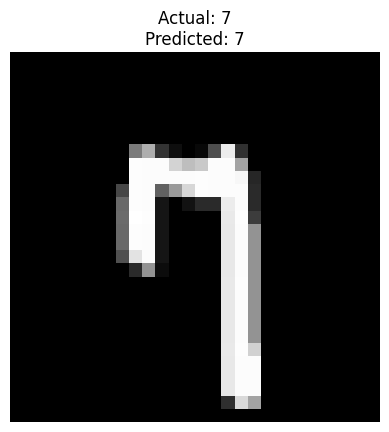

Actual: 7, Predicted: 7


In [12]:

## Step 5: Predict on a Single Image
def predict_image(model, image_index, dataset):
    model.eval()
    image, label = dataset[image_index]
    if torch.cuda.is_available():
        image = image.to(device)

    with torch.no_grad():
        output = model(image.unsqueeze(0))
        _, predicted = torch.max(output, 1)

    class_names = [str(i) for i in range(10)]

    print('Name: GANESH D ')
    print('Register Number: 212223240035')
    plt.imshow(image.cpu().squeeze(), cmap="gray")
    plt.title(f'Actual: {class_names[label]}\nPredicted: {class_names[predicted.item()]}')
    plt.axis("off")
    plt.show()
    print(f'Actual: {class_names[label]}, Predicted: {class_names[predicted.item()]}')
# Example Prediction
predict_image(model, image_index=80, dataset=test_dataset)